# 資料分析與學習基石 hw1
- Name: 黃振宏
- Department: 機械系
- Id: E14046402

In [1]:
# import package
import pandas as pd

# load file
pd_data = pd.read_csv('./Reviews.csv')

# only use the first 10000 rows
pd_data = pd_data[:10000]
pd_data.head(10)
check = (pd_data['ProfileName'] == 'c2')

data = pd_data[check]

## 刪除不需要的資料

In [2]:
# remove unused label
pd_profile = pd_data.drop(['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text'], axis=1)


profileNames = pd_profile.ProfileName.values

In [3]:
# 計算字出現次數
count = pd_profile['ProfileName'].value_counts()

## 計算出現次數

In [4]:
# DataFrame for counting
profile_count = pd.DataFrame(columns=['rowNum', 'UserId', 'ProfileName', 'Score Count', 'Score'])

pc_size = 0
for rowPtr in range(0, profileNames.size - 1):
    # find profile in profile_count and save in pc_find
    pc_find = profile_count.loc[profile_count['ProfileName'] == profileNames[rowPtr]]
    rowSize, columnSize = pc_find.shape
    
    # if the profile no in the profile_count set, add it
    if rowSize == 0:
        profile_count.loc[pc_size] = pd_profile.loc[rowPtr]
        profile_count.loc[pc_size, 'Score Count'] = 1
        profile_count.loc[pc_size, 'rowNum'] = pc_size
        pc_size += 1
    
    # add score and count value
    else:
        profile_count.loc[pc_find.iloc[0, 0], 'Score Count'] += 1    # add count Num
        profile_count.loc[pc_find.iloc[0, 0], 'Score'] += pd_profile.loc[rowPtr, 'Score']    # add score sum

## 計算 mean score and sorting

In [5]:
# calculate mean score
pc_size, width = profile_count.shape
for rowPtr in range(0, pc_size - 1):
    profile_count.loc[rowPtr, 'Score'] /= profile_count.loc[rowPtr, 'Score Count']

# sorting
profile_count = profile_count.sort_values(by=['Score Count', 'Score'], ascending=False)

# delete unused data
profile_count = profile_count.drop(['rowNum'], axis=1)

## Top-10 Reviewer

In [6]:
# rename label
profile_count = profile_count.rename(index=str, columns={'Score': 'Score Mean'})

profile_count.head(10)

,UserId,ProfileName,Score Count,Score Mean
142,A1Z54EM24Y40LL,c2,17,3.88235
150,A2PW7DRW757OL0,Chris,11,4.45455
203,A2RMYCQIST622H,Dan,10,4
7695,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.8
1047,A2MZ43MMIBFL7M,John,9,4.11111
3267,A35R32TA60XD57,M. Torma,9,4.11111
1327,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5
1477,A1F8ZVEP18FL45,Jim,7,4.85714
459,A3PJZ8TU8FDQ1K,Jared Castle,7,4.71429
366,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.42857


## Score Distribution

In [7]:
pd_data['Score'].hist(bins=5)

## correlation between numbers of reviews and date

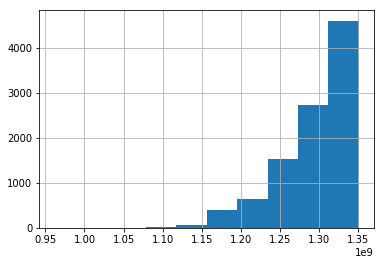

In [8]:
pd_reviews = pd_data['Time'].value_counts()
pd_data['Time'].hist(bins=10)

## HeatMap 

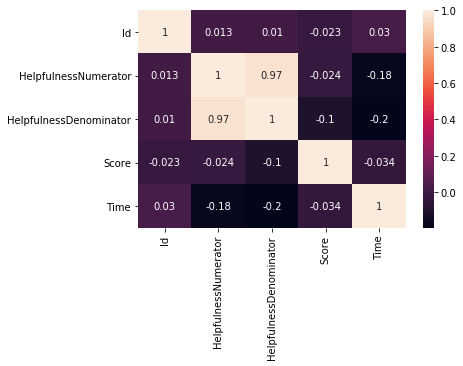

In [10]:
import seaborn as sns
pd_corr = pd_data.drop(['ProductId', 'Summary', 'Text', 'ProfileName', 'UserId'], axis=1)

corr = pd_corr.corr()

heatMap = sns.heatmap(corr, annot=True)

## Helpful percent

In [12]:
row_size, column_size = pd_data.shape

for rowNum in range(0, row_size - 1):
    if pd_data.loc[rowNum, 'HelpfulnessNumerator'] > pd_data.loc[rowNum, 'HelpfulnessDenominator']:
        print(rowNum)
        pd_data.loc[rowNum, 'percent'] = 1

    else:
        if pd_data.loc[rowNum, 'HelpfulnessDenominator'] == 0:
            pd_data.loc[rowNum, 'percent'] = 0
        else:
            pd_data.loc[rowNum, 'percent'] = pd_data.loc[rowNum, 'HelpfulnessNumerator'] / pd_data.loc[rowNum, 'HelpfulnessDenominator']

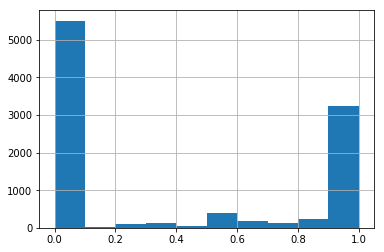

In [13]:
pd_data['percent'].hist(bins=10)